- [Data](#Data)
- [Model](#Model)

# Dependencies

In [101]:
#visualization
import matplotlib.pyplot as plt

#math tools
import numpy as np
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import MinMaxScaler

#machine learning
import torch
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
print(device)

#utils
from time import time
from os.path import join
from os import listdir


cuda


# Utils

In [285]:
measure2index={"y-coordinate":0,"x-coordinate":1,"timestamp":2, "button_status":3,"pressure":4, "tilt":5,"elevation":6}
index2measure=list(measure2index.keys())

task2index={"spiral":0,"l":1,"le":2 ,"les":3,"lektorka" :4,"porovnat":5,"nepopadnout":6, "tram":7}
index2task=list(task2index.keys())

In [3]:
index2measure

['x-coordinate',
 'y-coordinate',
 'timestamp',
 'button_status',
 'pressure',
 'tilt',
 'elevation']

In [4]:
index2task

['spiral', 'l', 'le', 'les', 'lektorka', 'porovnat', 'nepopadnout', 'tram']

In [5]:
def timeSince(since):
    now = time()
    s = now - since
    m = np.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

# Data
## Loading

In [6]:
data_path=join("..","PaHaW","PaHaW_public")#/00026/00026__1_1.svc"
folder_path=listdir(data_path)
folder_path.sort()

In [7]:
meta_path=join("..","PaHaW","corpus_PaHaW.csv")
meta_data=[]
with open(meta_path) as file:
    for line in file.readlines():
        meta_data.append(line.split(";"))
meta_data.pop(0)
meta_data=np.asarray(meta_data)
labels=[1 if i =="ON" else 0 for i in meta_data[:,4]]


In [8]:
#a priori unnecessary for binary classif
target=[[0,1] if i ==1 else [1,0] for i in labels]

In [9]:
task_path=listdir(join(data_path,folder_path[46]))
task_path.sort()

Subjects 46 (control),
60 (PD) and
66 (control) didn't perform the spiral !


In [10]:
raw=[]
for folder in folder_path:
    subject=[]
    task_path=listdir(join(data_path,folder))
    task_path.sort()
    if len(task_path)!=8:#subject didn't perform the spiral
        subject.append([])#add an empty array so that all tasks are on the same column number
    for task in task_path:
        measures=[]
        path=join(data_path,folder,task)
        with open(path) as file:
            for line in file.readlines():
                measures.append(line.split())
            measures.pop(0)
        subject.append(measures)
    raw.append(subject)

In [11]:
print("(75 subjects, 8 tasks, X task duration*200, 7 recorded signals)")
print(len(raw),len(raw[0]),len(raw[0][0]),len(raw[0][0][0]))

(75 subjects, 8 tasks, X task duration*200, 7 recorded signals)
75 8 1772 7


The task sequence is in average **2286** &rarr; task duration is in average 11.4s

In [11]:
"""somme=0
for subject in raw:
    for task in subject:
        if len(task)!=0:#we don't take into account the 3 spirals not performed by subjects 46, 60 and 66
            somme+=len(task)
print("moyenne longueur",somme/(75*8-3))#-3 because 3 subjects didn't perform 1 task"""

'somme=0\nfor subject in raw:\n    for task in subject:\n        if len(task)!=0:#we don\'t take into account the 3 spirals not performed by subjects 46, 60 and 66\n            somme+=len(task)\nprint("moyenne longueur",somme/(75*8-3))#-3 because 3 subjects didn\'t perform 1 task'

In [12]:
measure2index

{'x-coordinate': 0,
 'y-coordinate': 1,
 'timestamp': 2,
 'button_status': 3,
 'pressure': 4,
 'tilt': 5,
 'elevation': 6}

## Exploration

spiral
l
le
les
lektorka
porovnat
nepopadnout
tram


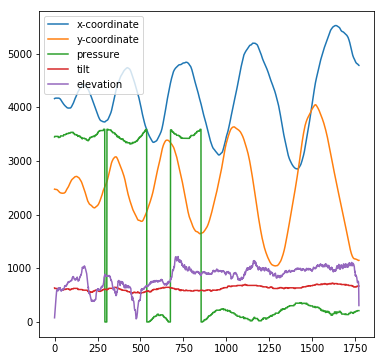

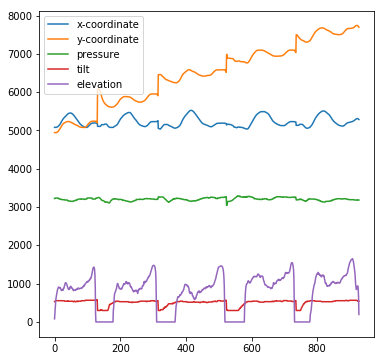

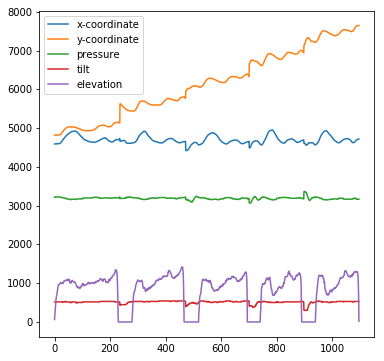

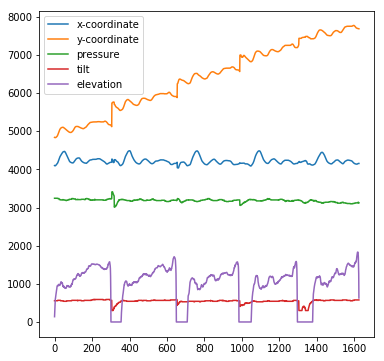

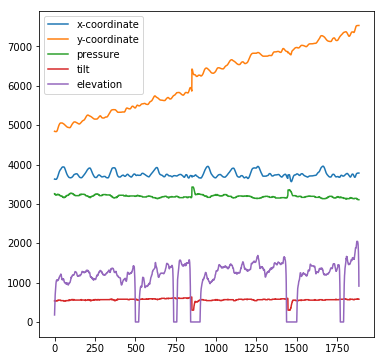

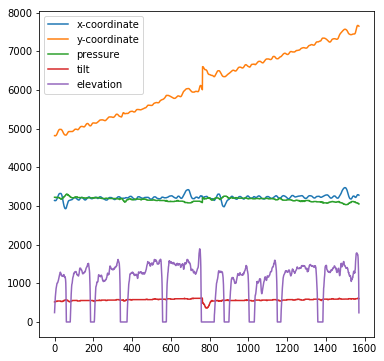

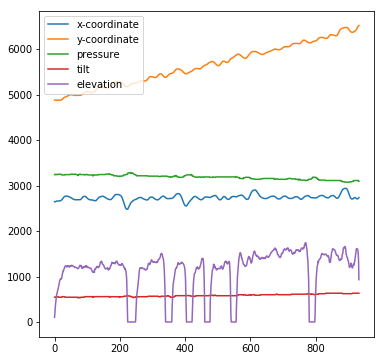

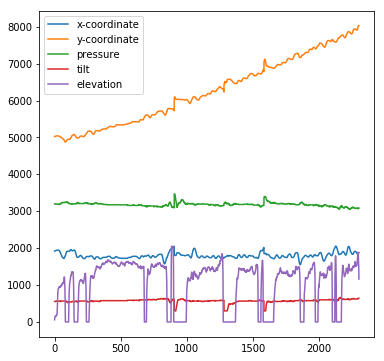

In [16]:
%matplotlib inline
subject_index=0#np.random.randint(0,len(labels))
for j in range(8):
    print(index2task[j])
    task=np.asarray(raw[subject_index][j],dtype=int)
    if task.size!=0:
        plt.figure(figsize=(6,6))
        for i in [0,1,4,5,6]:
            plt.plot(task[:,i],label=index2measure[i])
            plt.legend()
    else:
        print("Subject n° {} didn't perform {} task".format(subject_index,index2task[j]))
    

0
spiral
l
le
les
lektorka
porovnat
nepopadnout
tram


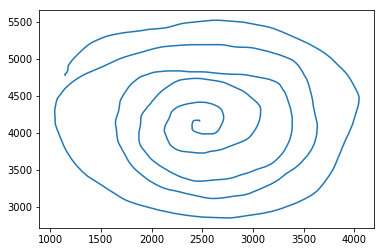

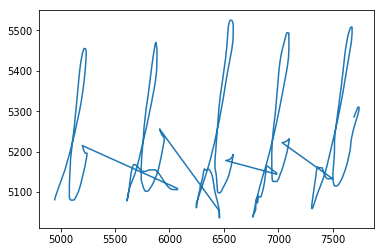

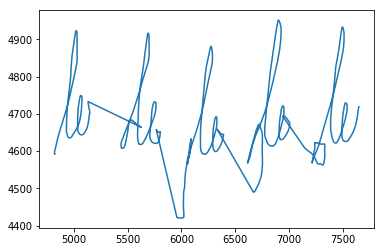

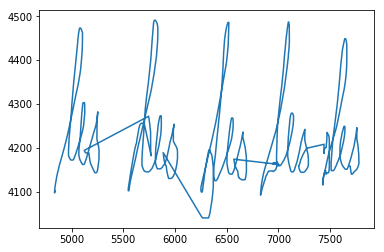

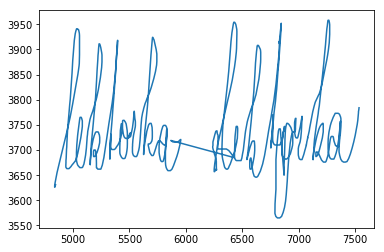

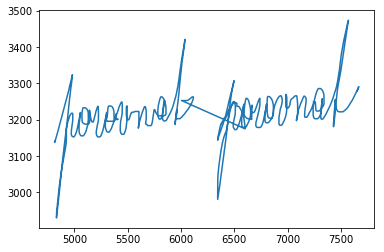

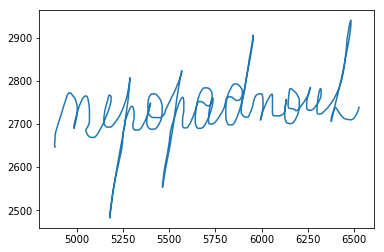

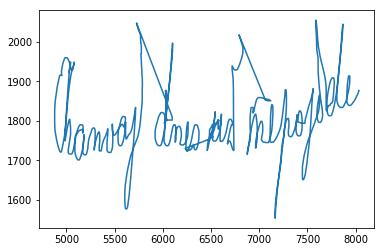

In [204]:
%matplotlib inline
subject_index=0#np.random.randint(0,len(labels))
print(subject_index)
for j in range(8):
    print(index2task[j])
    task=np.asarray(raw[subject_index][j],dtype=int)
    if task.size!=0:
        plt.figure()
        plt.plot(task[:,1],task[:,0])
    else:
        print("Subject n° {} didn't perform {} task".format(subject_index,index2task[j]))

## Preprocessing


### Standardize
along axis 0 in order to normalize all the measures independently (i.e. not all time steps independently)  
Cf. Report #4 : it's better to standardize than to normalize !

0
spiral
l
le
les
lektorka
porovnat
nepopadnout
tram


/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/paul/anaconda3/envs/pytorch/lib/python3.7/

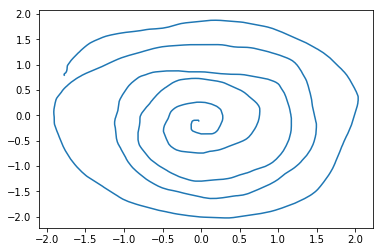

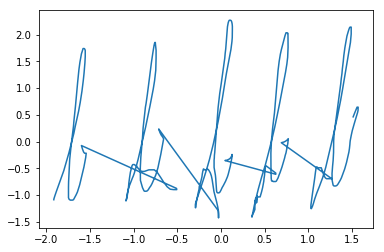

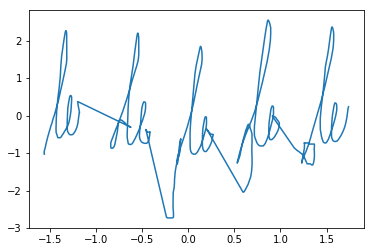

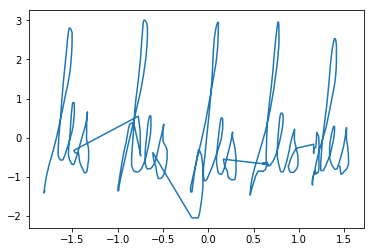

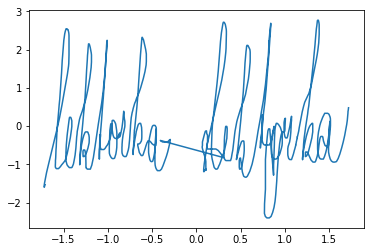

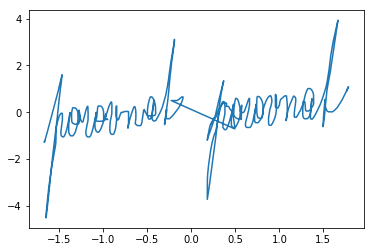

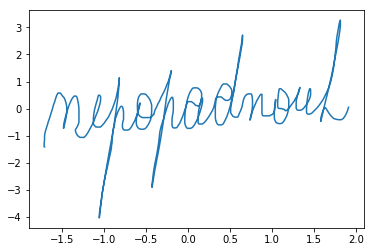

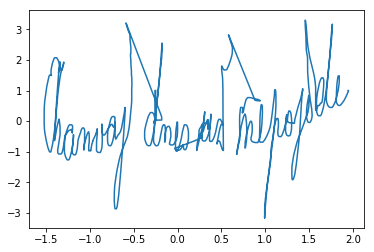

In [298]:
%matplotlib inline
subject_index=0#np.random.randint(0,len(labels))
print(subject_index)
for j in range(8):
    print(index2task[j])
    task=scale(np.asarray(raw[subject_index][j],dtype=int),axis=0)
    if task.size!=0:
        plt.figure()
        plt.plot(task[:,1],task[:,0])
    else:
        print("Subject n° {} didn't perform {} task".format(subject_index,index2task[j]))

## Spirals

In [299]:
spirals=[raw[i][0]  for i,subject in enumerate(raw) if len(raw[i][0])!=0]#discard the subjects that didn't perform spiral

In [300]:
spiral_targets= [labels[i]  for i,subject in enumerate(raw) if len(raw[i][0])!=0]
#for multi class #
#spiral_targets=[target[i]  for i,subject in enumerate(raw) if len(raw[i][0])!=0]
#discard the subjects that didn't perform spiral

In [301]:
spiral_lengths=[len(spiral) for spiral in spirals]

the lengths of the spirals is extremely variable :  
mean, std :  
(2873.6944444444443, 2242.0327745578024)

But the length of the spiral is not discriminant

In [302]:
np.mean(spiral_lengths),np.std(spiral_lengths)

(2873.6944444444443, 2242.0327745578024)

In [303]:
for i,spiral in enumerate(spirals):
    spirals[i]=scale(np.asarray(spiral,dtype=int),axis=0)

/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/paul/anaconda3/envs/pytorch/lib/python3.7/

/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/paul/anaconda3/envs/pytorch/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)
/home/paul/anaconda3/envs/pytorch/lib/python3.7/

In [304]:
len(spirals),len(spiral_targets)

(72, 72)

In [305]:
#spiral_targets=np.asarray(spiral_targets,dtype=int)

### Data split
In order to provide for a meaningful comparison with works from Drotar et al. and Moetesum et al. we will evaluate our results using a 10-fold cross validation

In [306]:
skf = StratifiedKFold(n_splits=10, random_state=1,shuffle=True)
cv_generator=skf.split(spirals, spiral_targets)

In [197]:
"""for train_index,test_index in skf.split(spirals, spiral_targets):
    print(train_index)
    print(np.mean([labels[i] for i in train_index]))"""

'for train_index,test_index in skf.split(spirals, spiral_targets):\n    print(train_index)\n    print(np.mean([labels[i] for i in train_index]))'

# Model
- [**Pytorch LSTM doc**](https://pytorch.org/docs/stable/nn.html#torch.nn.LSTM)
- [**Pytorch Linear doc**](https://pytorch.org/docs/stable/nn.html#torch.nn.Linear)

## Definition

In [307]:
class Model(torch.nn.Module):
    """
    Args:
        #Vanilla LSTM
        input_size: The number of expected features in the input `x`
        hidden_size: The number of features in the hidden state `h`
        num_layers: Number of recurrent layers. E.g., setting ``num_layers=2``
            would mean stacking two LSTMs together to form a `stacked LSTM`,
            with the second LSTM taking in outputs of the first LSTM and
            computing the final results. Default: 1
        bias: If ``False``, then the layer does not use bias weights `b_ih` and `b_hh`.
            Default: ``True``
        batch_first: If ``True``, then the input and output tensors are provided
            as (batch, seq, feature). Default: ``False``
        dropout: If non-zero, introduces a `Dropout` layer on the outputs of each
            LSTM layer except the last layer, with dropout probability equal to
            :attr:`dropout`. Default: 0
        bidirectional: If ``True``, becomes a bidirectional LSTM. Default: ``False``
        
        #our model
        batch_size : default : 1
        output_size : default : 2
    """
    def __init__(self, input_size, hidden_size,num_layers=1, bias=True,batch_first=False,
                 dropout=0,bidirectional=False, batch_size=1, output_size=2):
        super(Model, self).__init__()
        #Vanilla LSTM
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.bias=bias
        self.batch_first=batch_first
        self.dropout=dropout
        self.bidirectional=bidirectional
        #our model
        self.batch_size = batch_size
        self.output_size = output_size

        # Define the LSTM layer
        self.encoder = torch.nn.LSTM(self.input_size, self.hidden_size, self.num_layers,self.bias,self.batch_first,
                            self.dropout,self.bidirectional)

        # Define the decoder layer
        self.linear = torch.nn.Linear(self.hidden_size, self.output_size)
        self.sigmoid = torch.nn.Sigmoid()

    def init_hidden(self):
        """h_0 of shape (num_layers * num_directions, batch, hidden_size): 
        tensor containing the initial hidden state for each element in the batch. 
        If the RNN is bidirectional, num_directions should be 2, else it should be 1.

        c_0 of shape (num_layers * num_directions, batch, hidden_size): 
        tensor containing the initial cell state for each element in the batch.
        """
        num_directions=1
        if self.bidirectional:
            num_directions=2
        # This is what we'll initialise our hidden state as
        return (torch.zeros(self.num_layers*num_directions, self.batch_size, self.hidden_size),
                torch.zeros(self.num_layers*num_directions, self.batch_size, self.hidden_size))

    def forward(self, input):
        # Forward pass through LSTM layer
        # shape of encoder_out: (seq_len, batch, num_directions * hidden_size)
        # shape of self.hidden: (h_n, c_n), where hidden state h_n and cell state c_n both 
        # have shape (num_layers * num_directions, batch, hidden_size).
        encoder_out, self.hidden = self.encoder(input)
        #print(encoder_out.shape)
        
        if self.bidirectional:
            #sums the outputs : direction left-right and direction right-left
            # encoder_out shape should now be (seq_len, batch,hidden_size)
            encoder_out = encoder_out[: ,: ,: self.hidden_size] + encoder_out[: , :, self.hidden_size: ]
        
        # Only take the output from the final timestep
        # Can pass on the entirety of encoder_out to the next layer if it is a seq2seq prediction
        y_pred = self.linear(encoder_out[-1])
        y_pred = self.sigmoid(y_pred)
        return y_pred.squeeze(0)


## Hyperparameters

In [308]:
learning_rate = 1e-3
hidden_size=100
num_layers=1
bidirectional=False
dropout=0.0

input_size=7#==len(index2measure)
bias=True
batch_first=False#we should unsqueeze(1) to add a batch dimension
batch_size=1
output_size=1#binary classif : 1 means PD, 0 means control

In [309]:
model=Model(input_size, hidden_size,num_layers, bias,batch_first,
                 dropout,bidirectional, batch_size, output_size)
model.hidden=model.init_hidden()
model=model.to(device)
loss_fn=torch.nn.BCELoss()#Binary cross entropy
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training
## step
[**Pytorch Binary Cross Entropy loss (BCELoss) doc**](https://pytorch.org/docs/stable/nn.html#torch.nn.BCELoss)

In [310]:
def step(input, target, model, optimizer, loss_fn, batch_size,validation = False):
    if not validation:
        # Zero gradients
        optimizer.zero_grad()    
        
    # Set device options
    input=input.to(device)
    target=target.to(device)
        
    #forward pass
    output=model(input)
    
    # Compute loss
    loss = loss_fn(output, target)
    
    
    
    if not validation:
        # Perform backpropagation
        loss.backward()
        #clip gradients to previent exploding
        #torch.nn.utils.clip_grad_norm_(model.parameters(), 50.0)
        # Adjust model weights
        optimizer.step()
    
    return loss.item(), output.item()

## epoch

In [326]:
def epoch(data,targets, model, optimizer, loss_fn, batch_size, random_index,validation=False):
    losses=[]
    predictions=[]
    condition_targets=[]
    
    for index in random_index:
        condition_targets.append(targets[index])
        #numpy to tensor
        subject=torch.Tensor(data[index]).unsqueeze(1)#add batch dimension
        target=torch.Tensor([targets[index]])        
        loss, prediction =step(subject,target, model, optimizer, loss_fn, batch_size,validation)
        predictions.append(round(prediction))
        losses.append(loss)
    
    #compute metrics
    tn, fp, fn, tp = metrics.confusion_matrix(y_true=condition_targets,y_pred=predictions,labels=[0,1]).ravel()
    accuracy= (tp+tn)/(tp+tn+fp+fn)
    sensitivity = tp/(tp+fn) if (tp+fn) != 0 else 0.0 #without condition positives the sensitivity should be 0
    specificity = tn/(tn+fp) if (tn+fp)!= 0 else 0.0 #idem
    ppv = tp/(tp+fp) if tp+fp != 0 else 0.0 #without predicted positives the ppv should be 0
    npv = tn/(tn+fn) if tn+fn !=0 else 0.0 #idem
    
    return [np.mean(losses),accuracy,sensitivity,specificity,ppv,npv]

## 10 fold cross validation (n_epochs per fold)

In [327]:
"""10 fold cross validation (n_epochs per fold)"""
verbose=False
skf = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
cv_generator=skf.split(spirals, spiral_targets)
fold_train_metrics,fold_valid_metrics=[],[]
start = time()
np.random.seed(1)
save_to_print=""
fold=0
n_epochs=5
for train_index,test_index in cv_generator:     
    train_metrics,valid_metrics=[],[]
    model=Model(input_size, hidden_size,num_layers, bias,batch_first,
                 dropout,bidirectional, batch_size, output_size)
    model.hidden=model.init_hidden()
    model=model.to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    
    
    for i in range(n_epochs):                
        to_print=""
        np.random.shuffle(train_index)
        np.random.shuffle(test_index)
        #training
        model.train()
        loss,accuracy,sensitivity,specificity,ppv,npv=epoch(
            spirals,spiral_targets, model, optimizer, loss_fn, batch_size, train_index,validation=False)
        train_metrics.append([loss,accuracy,sensitivity,specificity,ppv,npv])
        to_print+="\n\nfold n°{}, epoch n°{}, spent {}".format(fold,i,timeSince(start))
        to_print+="\nTRAINING : loss {:.3f}, accuracy {:.3f}".format(loss,accuracy)

        #validation
        model.eval()
        loss,accuracy,sensitivity,specificity,ppv,npv=epoch(
            spirals,spiral_targets, model, optimizer, loss_fn, batch_size, test_index,validation=True)    
        valid_metrics.append([loss,accuracy,sensitivity,specificity,ppv,npv])
        to_print+="\nVALIDATION : loss {:.3f}, accuracy {:.3f}, sensitivity  {:.3f}, specificity {:.3f}, ppv {:.3f}, npv {:.3f}".format(
            loss,accuracy,sensitivity,specificity,ppv,npv)

        if verbose:
            print(to_print)
        save_to_print+=to_print
        
    fold_train_metrics.append(train_metrics)
    fold_valid_metrics.append(valid_metrics)
    fold+=1
print(save_to_print)



fold n°0, epoch n°0, spent 0m 13s
TRAINING : loss 0.701, accuracy 0.516
VALIDATION : loss 0.660, accuracy 0.625, sensitivity  0.750, specificity 0.500, ppv 0.600, npv 0.667

fold n°0, epoch n°1, spent 0m 28s
TRAINING : loss 0.669, accuracy 0.656
VALIDATION : loss 0.892, accuracy 0.500, sensitivity  1.000, specificity 0.000, ppv 0.500, npv 0.000

fold n°0, epoch n°2, spent 0m 42s
TRAINING : loss 0.656, accuracy 0.641
VALIDATION : loss 0.633, accuracy 0.500, sensitivity  0.500, specificity 0.500, ppv 0.500, npv 0.500

fold n°0, epoch n°3, spent 0m 56s
TRAINING : loss 0.637, accuracy 0.672
VALIDATION : loss 0.713, accuracy 0.750, sensitivity  1.000, specificity 0.500, ppv 0.667, npv 1.000

fold n°0, epoch n°4, spent 1m 11s
TRAINING : loss 0.625, accuracy 0.672
VALIDATION : loss 0.662, accuracy 0.625, sensitivity  1.000, specificity 0.250, ppv 0.571, npv 1.000

fold n°1, epoch n°0, spent 1m 25s
TRAINING : loss 0.698, accuracy 0.547
VALIDATION : loss 0.687, accuracy 0.625, sensitivity  0.

## 1 over 10 fold training

In [321]:
verbose=False
train_metrics,valid_metrics=[],[]
train_index,test_index=next(cv_generator)

model=Model(input_size, hidden_size,num_layers, bias,batch_first,
                 dropout,bidirectional, batch_size, output_size)
model.hidden=model.init_hidden()
model=model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
save_to_print=""
start = time()
np.random.seed(1)




epoch n°0, spent 0m 13s
TRAINING : loss 0.706, accuracy 0.516
VALIDATION : loss 0.662, accuracy 0.625, sensitivity  0.250, specificity 1.000, ppv 1.000, npv 0.571

epoch n°1, spent 0m 27s
TRAINING : loss 0.685, accuracy 0.547
VALIDATION : loss 0.646, accuracy 0.875, sensitivity  0.750, specificity 1.000, ppv 1.000, npv 0.800

epoch n°2, spent 0m 42s
TRAINING : loss 0.672, accuracy 0.578
VALIDATION : loss 0.640, accuracy 0.625, sensitivity  0.250, specificity 1.000, ppv 1.000, npv 0.571


In [322]:
for i in range(3,5):  
    to_print=""
    np.random.shuffle(train_index)
    np.random.shuffle(test_index)
    #training
    model.train()
    loss,accuracy,sensitivity,specificity,ppv,npv=epoch(
        spirals,spiral_targets, model, optimizer, loss_fn, batch_size, train_index,validation=False)
    train_metrics.append([loss,accuracy,sensitivity,specificity,ppv,npv])
    to_print+="\n\nepoch n°{}, spent {}".format(i,timeSince(start))
    to_print+="\nTRAINING : loss {:.3f}, accuracy {:.3f}".format(loss,accuracy)
    
    #validation
    model.eval()
    loss,accuracy,sensitivity,specificity,ppv,npv=epoch(
        spirals,spiral_targets, model, optimizer, loss_fn, batch_size, test_index,validation=True)    
    valid_metrics.append([loss,accuracy,sensitivity,specificity,ppv,npv])
    to_print+="\nVALIDATION : loss {:.3f}, accuracy {:.3f}, sensitivity  {:.3f}, specificity {:.3f}, ppv {:.3f}, npv {:.3f}".format(
        loss,accuracy,sensitivity,specificity,ppv,npv)
    
    if verbose:
        print(to_print)    
    save_to_print+=to_print
print(save_to_print)



epoch n°0, spent 0m 13s
TRAINING : loss 0.706, accuracy 0.516
VALIDATION : loss 0.662, accuracy 0.625, sensitivity  0.250, specificity 1.000, ppv 1.000, npv 0.571

epoch n°1, spent 0m 27s
TRAINING : loss 0.685, accuracy 0.547
VALIDATION : loss 0.646, accuracy 0.875, sensitivity  0.750, specificity 1.000, ppv 1.000, npv 0.800

epoch n°2, spent 0m 42s
TRAINING : loss 0.672, accuracy 0.578
VALIDATION : loss 0.640, accuracy 0.625, sensitivity  0.250, specificity 1.000, ppv 1.000, npv 0.571

epoch n°3, spent 4m 0s
TRAINING : loss 0.649, accuracy 0.641
VALIDATION : loss 0.612, accuracy 0.875, sensitivity  0.750, specificity 1.000, ppv 1.000, npv 0.800

epoch n°4, spent 4m 14s
TRAINING : loss 0.662, accuracy 0.625
VALIDATION : loss 0.630, accuracy 0.625, sensitivity  0.250, specificity 1.000, ppv 1.000, npv 0.571


## Debug

In [227]:
subject=torch.Tensor(spirals[61]).unsqueeze(1)#add batch dimension
target=torch.Tensor([spiral_targets[61]])



In [235]:
step(subject,target, model, optimizer, loss_fn, batch_size)

(0.1351873129606247, 0.12644775211811066)

# Evaluation

In [400]:
print(np.argmax(np.asarray(fold_valid_metrics),axis=1)[:,1]+1)
print(np.max(np.asarray(fold_valid_metrics),axis=1)[:,1])

[4 1 1 1 1 2 1 2 2 2]
[0.75       0.625      0.75       0.5        0.625      0.5
 0.66666667 0.66666667 0.83333333 0.66666667]


In [370]:
print(np.argmin(np.asarray(fold_train_metrics),axis=1)[:,0])
print(np.min(np.asarray(fold_train_metrics),axis=1)[:,0])

[4 4 4 4 3 3 4 4 3 4]
[0.62464728 0.64307809 0.62566504 0.58279402 0.64310663 0.62741176
 0.62934603 0.65097628 0.63257871 0.61653227]


In [391]:
def print_results(train_metrics,valid_metrics):
    train_metrics,valid_metrics=np.asarray(train_metrics),np.asarray(valid_metrics)
    print(learning_rate ,"|",hidden_size,"|",num_layers,"|",bidirectional,"|",dropout,"|","{:.2f} (+ {:.2f}) ".format(
    np.mean(train_metrics[:,1]),np.std(train_metrics[:,1])),end="")
    
    valid_metrics=valid_metrics.T
    for metric in valid_metrics[1:]:#don't care about the loss
        mean,std=np.mean(metric),np.std(metric)
        print("| {:.2f} (+ {:.2f}) ".format(mean,std),end="")


In [392]:
print_results(np.max(np.asarray(fold_train_metrics),axis=1),np.max(np.asarray(fold_valid_metrics),axis=1))

0.001 | 100 | 1 | False | 0.0 | 0.65 (+ 0.03) | 0.66 (+ 0.10) | 0.66 (+ 0.26) | 0.79 (+ 0.19) | 0.77 (+ 0.20) | 0.68 (+ 0.17) 

## 10 fold cross validation with early stopping
/!\ validating on the test set /!\  
Average metric over the 10 folds + standard deviation  
Every metric is for the validation set if not specified otherwise

 learning_rate |hidden_size|num_layers|bidirectional|dropout|TRAIN accuracy | accuracy | Se | Sp | PPV | NPV
--|--|--|--|--|--|--|--|--|--|--
0.001 | 100 | 1 | False | 0.0 | 0.65 (+ 0.03) | 0.66 (+ 0.10) | 0.66 (+ 0.26) | 0.79 (+ 0.19) | 0.77 (+ 0.20) | 0.68 (+ 0.17) 

## 10 fold cross validation with 1 epoch per fold

 learning_rate |hidden_size|num_layers|bidirectional|dropout|train accuracy | valid accuracy 
--|--|--|--|--|--|--
0.001 | 100 | 2 | True | 0.0 | 0.508 (+ 0.044) | 0.571 (+ 0.107) 

# Visualization

In [343]:
np.asarray(fold_train_metrics).shape

(10, 5, 6)

In [335]:
avg_train=np.mean(np.asarray(fold_train_metrics),axis=0)
avg_valid=np.mean(np.asarray(fold_valid_metrics),axis=0)

## Loss

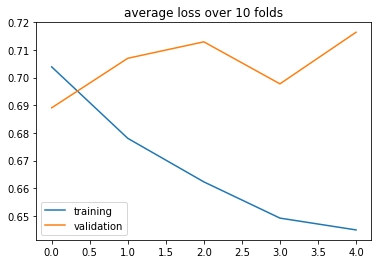

In [347]:
plt.figure()
plt.title("average loss over 10 folds")
plt.plot(avg_train[:,0],label="training")
plt.plot(avg_valid[:,0],label="validation")
plt.legend()

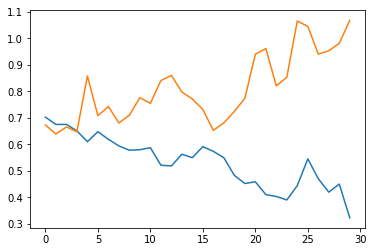

In [318]:
plt.figure()
plt.plot(np.asarray(train_metrics)[:,0],label="training loss")
plt.plot(np.asarray(valid_metrics)[:,0],label="validation loss")
plt.legend()

On all the data set

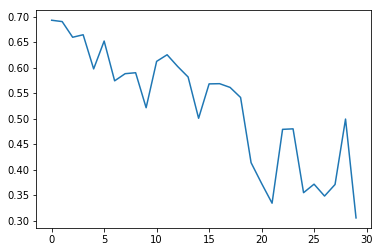

In [28]:
plt.figure()
plt.plot(np.asarray(save_metrics)[:,0],label="training loss")

Text(0.5, 1.0, 'on the training set (90% of all data)')

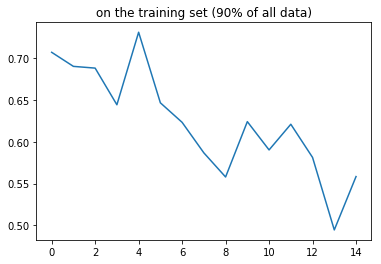

In [88]:
plt.plot(np.asarray(train_metrics)[:,0])
plt.title("on the training set (90% of all data)")

## Accuracy

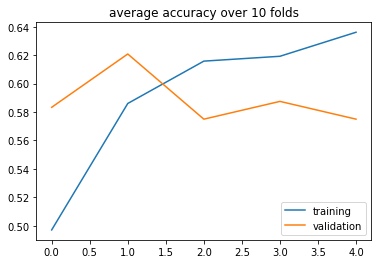

In [341]:
plt.figure()
plt.title("average accuracy over 10 folds")
plt.plot(avg_train[:,1],label="training")
plt.plot(avg_valid[:,1],label="validation")
plt.legend()

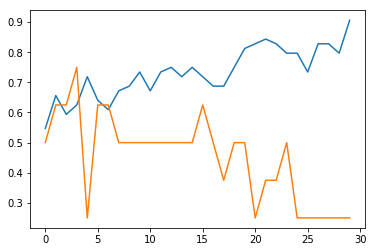

In [319]:
plt.figure()
plt.plot(np.asarray(train_metrics)[:,1],label="training accuracy")
plt.plot(np.asarray(valid_metrics)[:,1],label="validation accuracy")
plt.legend()